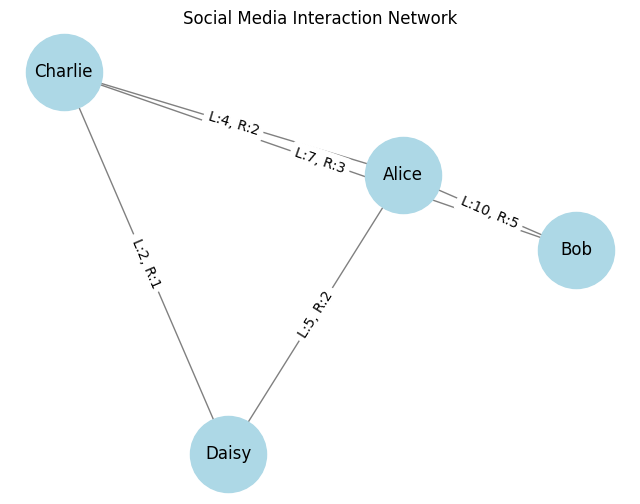

Top Influencers:
Alice: Centrality Score = 1.00
Charlie: Centrality Score = 1.00
Bob: Centrality Score = 0.67
Daisy: Centrality Score = 0.67

Edge Interaction Details:
Alice -> Bob: Likes = 10, Retweets = 5, Interaction Score = 15
Alice -> Charlie: Likes = 4, Retweets = 2, Interaction Score = 6
Bob -> Charlie: Likes = 7, Retweets = 3, Interaction Score = 10
Charlie -> Daisy: Likes = 2, Retweets = 1, Interaction Score = 3
Daisy -> Alice: Likes = 5, Retweets = 2, Interaction Score = 7


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx


G = nx.DiGraph()


G.add_edge('A', 'B', Likes=10, Retweets=5, weight=15)
G.add_edge('A', 'C', Likes=4, Retweets=2, weight=6)
G.add_edge('B', 'C', Likes=7, Retweets=3, weight=10)
G.add_edge('C', 'D', Likes=2, Retweets=1, weight=3)
G.add_edge('D', 'A', Likes=5, Retweets=2, weight=7)


random_names = {
    'A': 'Alice', 'B': 'Bob', 'C': 'Charlie', 'D': 'Daisy'
}


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edge_color="gray", arrows=True)
nx.draw_networkx_labels(G, pos, labels=random_names)


edge_labels = {
    (u, v): f"L:{data['Likes']}, R:{data['Retweets']}"
    for u, v, data in G.edges(data=True)
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Social Media Interaction Network")
plt.axis("off")
plt.show()


degree_centrality = nx.degree_centrality(G)
sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Top Influencers:")
for user, score in sorted_centrality:
    print(f"{random_names.get(user, user)}: Centrality Score = {score:.2f}")

print("\nEdge Interaction Details:")
for u, v, data in G.edges(data=True):
    print(f"{random_names.get(u, u)} -> {random_names.get(v, v)}: Likes = {data['Likes']}, Retweets = {data['Retweets']}, Interaction Score = {data['weight']}")
